In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name=None)

In [4]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2024 Budgets']

In [5]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
df_budgets.head(5)

,Product Name,2024 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [11]:
print(f"df_sales shape : {df_sales.shape}")
print(f"df_customers shape : {df_customers.shape}")
print(f"df_products shape : {df_products.shape}")
print(f"df_regions shape : {df_regions.shape}")
print(f"df_state_reg shape : {df_state_reg.shape}")
print(f"df_budgets shape : {df_budgets.shape}")

df_sales shape : (64104, 12)
df_customers shape : (175, 2)
df_products shape : (30, 2)
df_regions shape : (994, 15)
df_state_reg shape : (49, 3)
df_budgets shape : (30, 2)


In [12]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [13]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [14]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [15]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [16]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [17]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [18]:
df_budgets.isnull().sum()

,0
Product Name,0
2024 Budgets,0


In [19]:
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [20]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [21]:
df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

In [22]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [23]:
df = df.merge(
    df_regions,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)

In [24]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [25]:
df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)

In [26]:
df = df.merge(
    df_budgets,
    how = 'left',
    on = 'Product Name'
)

In [27]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2024 Budgets
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [28]:
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df.drop(columns=cols_to_drop, errors = 'ignore')

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2024 Budgets
0,SO - 000225,2021-01-01 00:00:00,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01 00:00:00,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01 00:00:00,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2025-02-28 00:00:00,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,5685138.270
64100,SO - 0007706,2025-02-28 00:00:00,51,Export,USD,NXH382,444,21,6,864.3,...,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,959899.218
64101,SO - 0007718,2025-02-28 00:00:00,136,Distributor,USD,AXW291,312,13,11,3953.0,...,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,3720639.645
64102,SO - 0008084,2025-02-28 00:00:00,158,Distributor,USD,AXW291,737,20,7,3959.7,...,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,2067108.120


In [29]:
df.columns = df.columns.str.lower()

In [30]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index',
       'customer names', 'index', 'product name', 'id', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'state code', 'region',
       '2024 budgets'], dtype=object)

In [31]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2024 budgets'
]

In [32]:
df = df[cols_to_keep]

In [33]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2024 budgets
0,SO - 000225,2021-01-01 00:00:00,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01 00:00:00,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01 00:00:00,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [34]:
df = df.rename(columns = {
    'ordernumber' : 'order_number',
    'orderdate' : 'order_date',
    'customer names' : 'customer_name',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'total_unit_cost' : 'cost',
    '2024 budgets' : 'budget'
})

In [35]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,latitude,longitude,budget
0,SO - 000225,2021-01-01 00:00:00,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01 00:00:00,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01 00:00:00,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01 00:00:00,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01 00:00:00,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [36]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [37]:
df.loc[df['order_date'].dt.year !=2024, 'budget'] = pd.NA

In [38]:
df[['order_date', 'product_name', 'revenue', 'budget']].head(5)

,order_date,product_name,revenue,budget
0,2021-01-01,Product 27,14994.6,NaN
1,2021-01-01,Product 20,25868.7,NaN
2,2021-01-01,Product 26,5869.2,NaN
3,2021-01-01,Product 7,16368.1,NaN
4,2021-01-01,Product 8,18331.2,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64068 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total unit cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state            64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

In [40]:
df_2024 = df[df['order_date'].dt.year == 2024]

In [41]:
df_2024.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,latitude,longitude,budget
46363,SO - 0002544,2024-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2024-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2024-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2024-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2024-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


In [42]:
df.isnull().sum()

,0
order_number,0
order_date,36
customer_name,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
total unit cost,0
state_code,0


In [43]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [44]:
df['profit'] = df['revenue'] - df['total_cost']

In [45]:
df['profit_margin_pecentage'] = df['profit'] / df['revenue'] * 100

In [46]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state_code,county,state,region,latitude,longitude,budget,total_cost,profit,profit_margin_pecentage
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


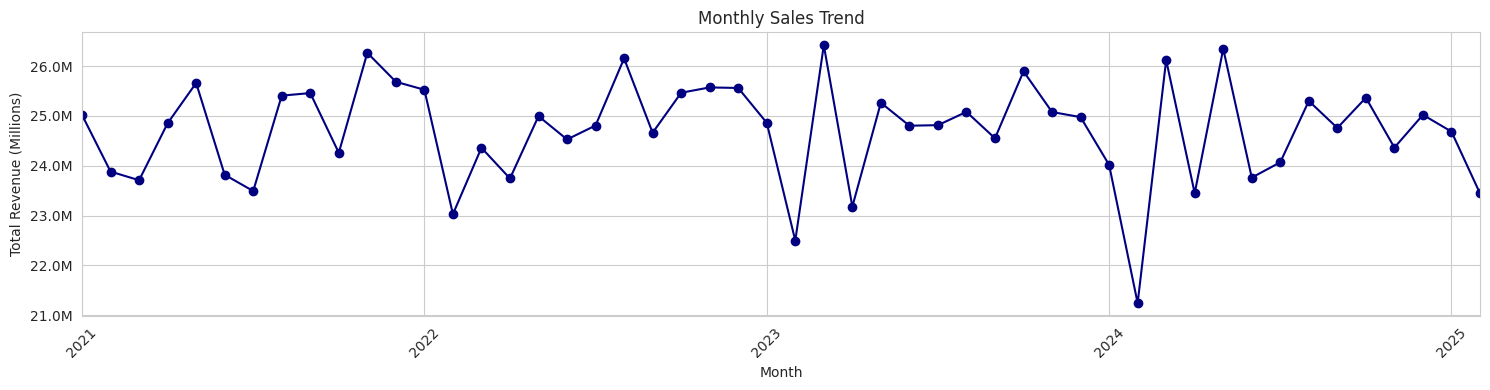

In [47]:
df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o', color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [49]:
df['order_month_num'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.month_name()

In [50]:
df_ = df[df['order_date'].dt.year != 2025]

In [51]:
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

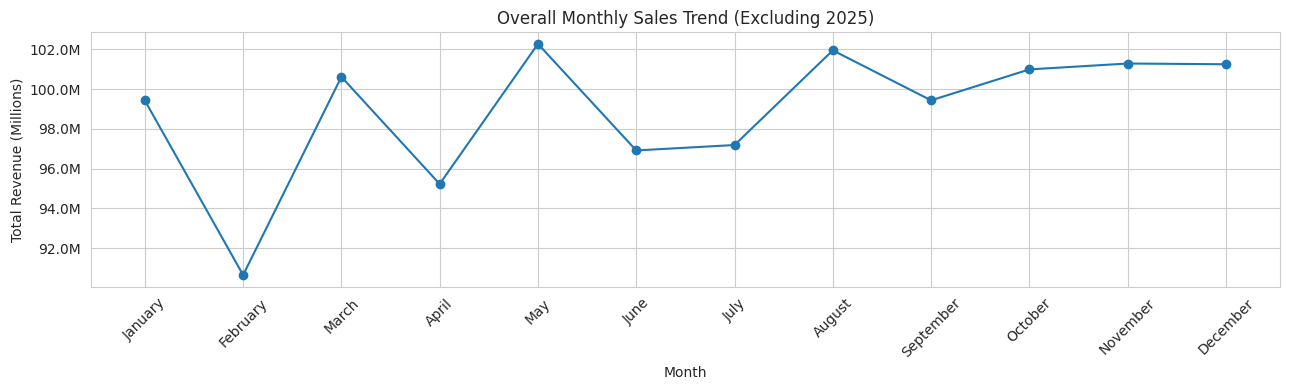

In [52]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),
    monthly_sales.values,
    marker='o'
)

formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Overall Monthly Sales Trend (Excluding 2025)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4175972783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


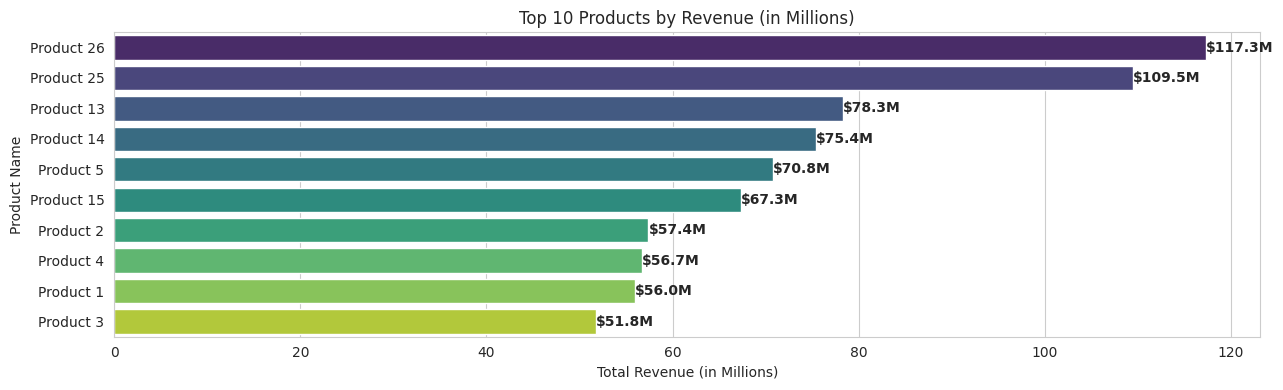

In [53]:
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000
top_prod = top_prod.nlargest(10)
plt.figure(figsize=(13, 4))

ax = sns.barplot(
    x=top_prod.values,
    y=top_prod.index,
    palette='viridis'
)

plt.title('Top 10 Products by Revenue (in Millions)')
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')

for i, v in enumerate(top_prod.values):
    ax.text(v + 0.01, i, f'${v:.1f}M', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-268948982.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


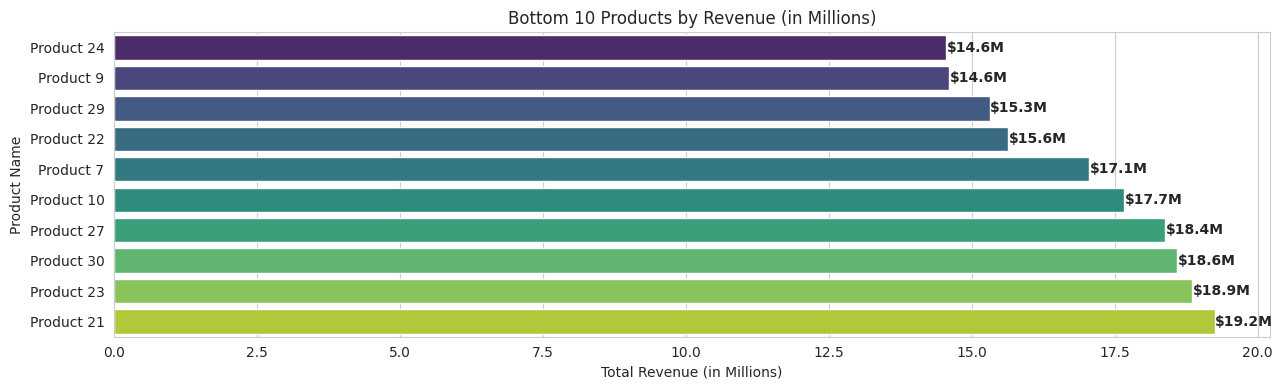

In [54]:
bottom_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

bottom_prod = bottom_prod.nsmallest(10)

plt.figure(figsize=(13, 4))

ax = sns.barplot(
    x=bottom_prod.values,
    y=bottom_prod.index,
    palette='viridis'
)

plt.title('Bottom 10 Products by Revenue (in Millions)')
plt.xlabel('Total Revenue (in Millions)')
plt.ylabel('Product Name')

for i, v in enumerate(bottom_prod.values):
    ax.text(v + 0.01, i, f'${v:.1f}M', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

/tmp/ipython-input-3231823933.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


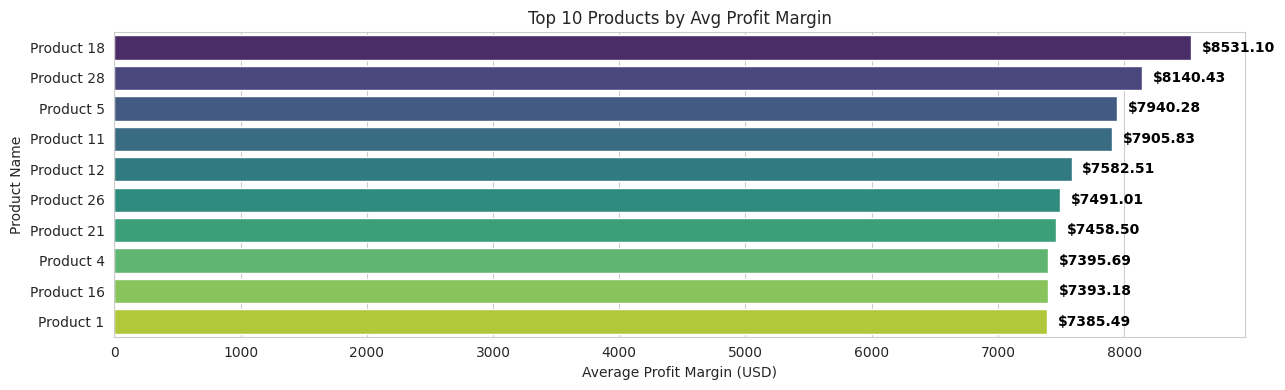

In [55]:
top_margin = (
    df.groupby('product_name')['profit']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(13, 4))

ax = sns.barplot(
    x=top_margin.values,
    y=top_margin.index,
    palette='viridis'
)

plt.title('Top 10 Products by Avg Profit Margin')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Product Name')

for i, v in enumerate(top_margin.values):
    ax.text(v + (top_margin.max() * 0.01),
            i,
            f'${v:.2f}',
            va='center',
            fontweight='bold',
            color='black')

plt.tight_layout()
plt.show()

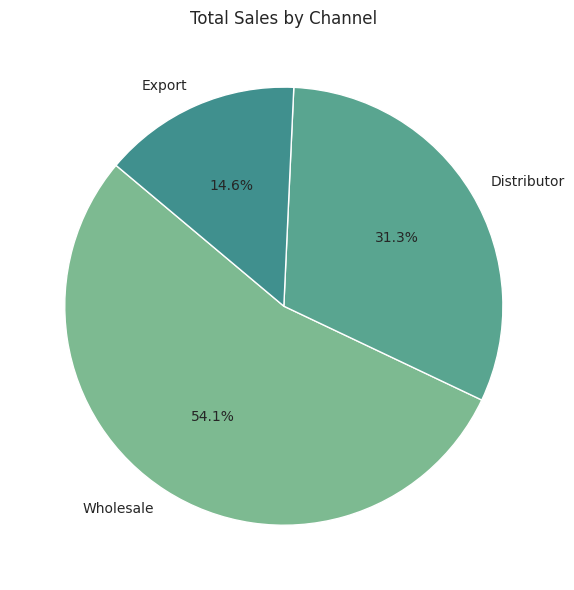

In [56]:
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,6))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('crest')
)

plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

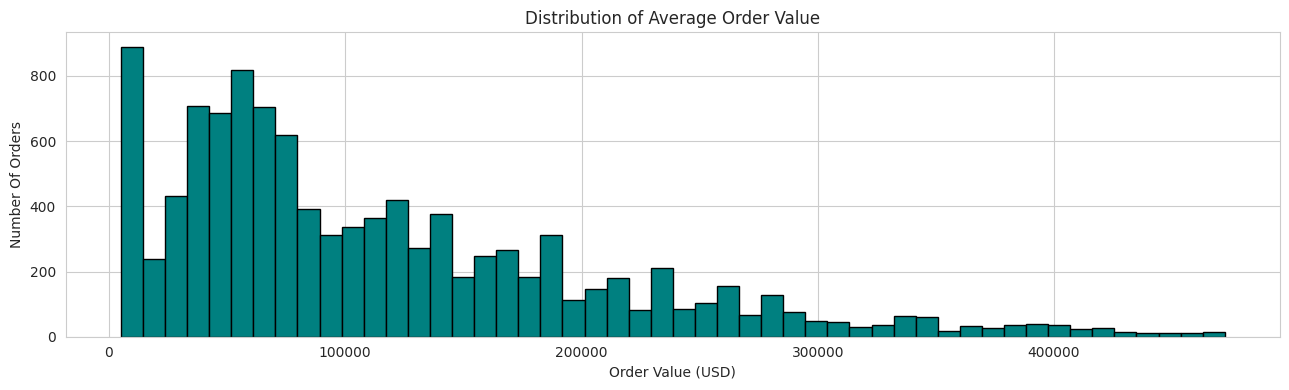

In [57]:
aov = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(13, 4))
plt.hist(
    aov,
    bins = 50,
    color = 'teal',
    edgecolor = 'black'
    )
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number Of Orders')
plt.tight_layout()
plt.show()

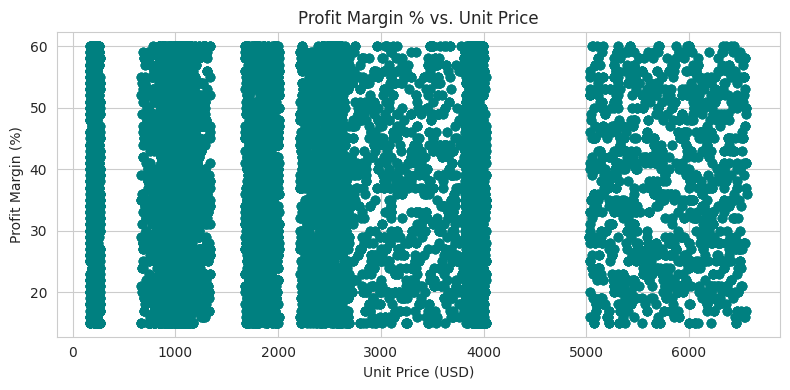

In [58]:
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

plt.figure(figsize=(8,4))

plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    alpha=0.6,
    color='teal'
)

plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')

plt.tight_layout()

plt.show()

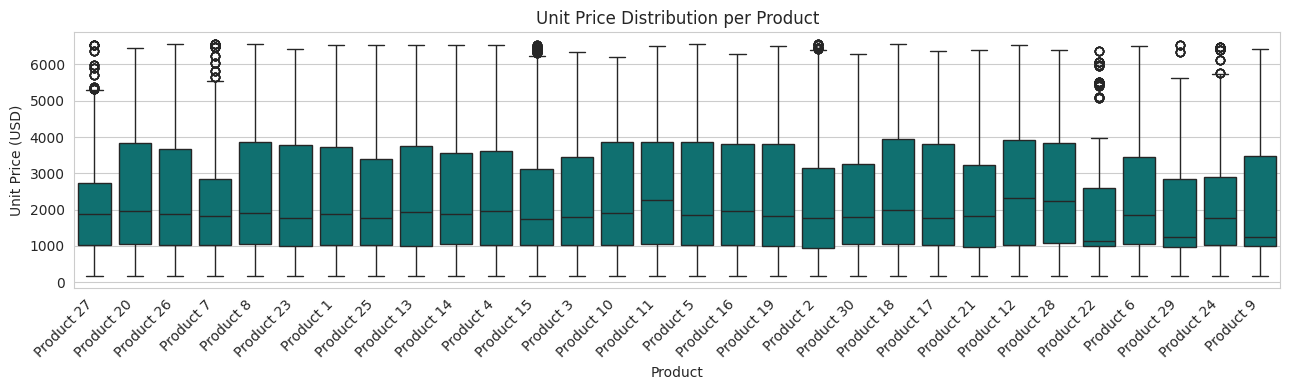

In [59]:
plt.figure(figsize=(13,4))

sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    color='teal'
)

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3431344858.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


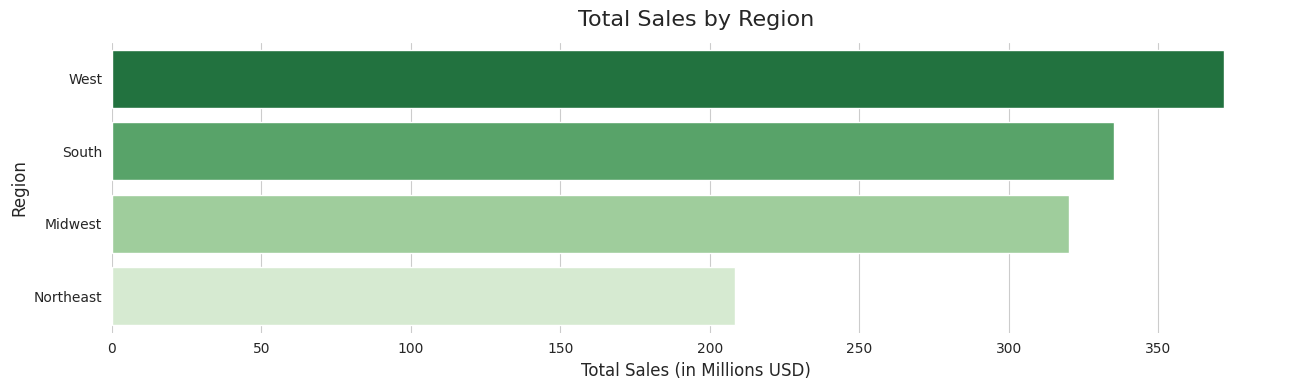

In [60]:
region_sales = (
    df.groupby('region')['revenue'].sum()
    .sort_values(ascending=False)
    / 1e6
)

plt.figure(figsize=(13, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'
)

plt.title('Total Sales by Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [61]:
import plotly.express as px

state_sales = (df.groupby('state')['revenue'].sum().reset_index())
state_sales['revenue_m'] = state_sales['revenue'] / 1e6


fig = px.choropleth(
    state_sales,
    locations='state',
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}
)

fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

/tmp/ipython-input-2650421592.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2650421592.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




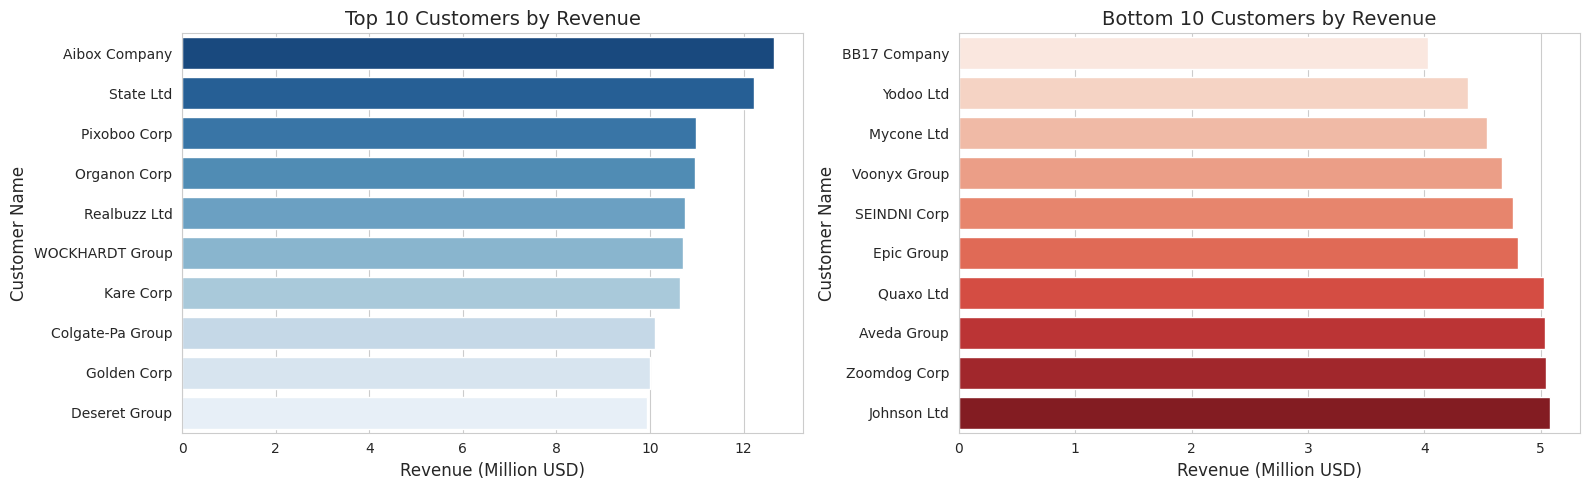

In [62]:
top_rev = (df.groupby('customer_name')['revenue'].sum()
      .sort_values(ascending=False).head(10))


bottom_rev = (df.groupby('customer_name')['revenue'].sum()
      .sort_values(ascending=True).head(10))


fig, axes = plt.subplots(1, 2, figsize=(16, 5))


sns.barplot(
    x=top_rev.values / 1e6,
    y=top_rev.index,
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)


sns.barplot(
    x=bottom_rev.values / 1e6,
    y=bottom_rev.index,
    palette='Reds',
    ax=axes[1]
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)


plt.tight_layout()
plt.show()

/tmp/ipython-input-1291345126.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




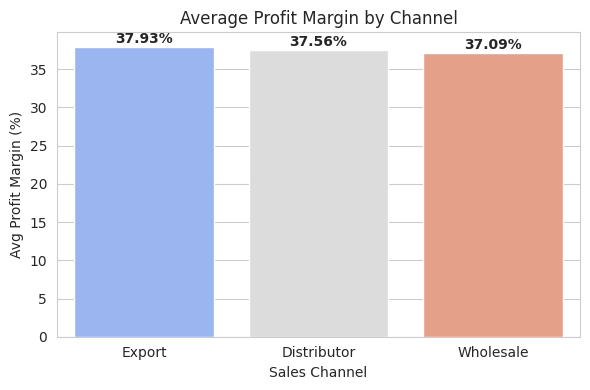

In [63]:
channel_margin = (df.groupby('channel')['profit_margin_pct'].mean()
      .sort_values(ascending=False))


plt.figure(figsize=(6, 4))


ax = sns.barplot(
    x=channel_margin.index,
    y=channel_margin.values,
    palette='coolwarm'
)


plt.title('Average Profit Margin by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Avg Profit Margin (%)')


for i, v in enumerate(channel_margin.values):
    ax.text(
        i,
        v + 0.5,
        f"{v:.2f}%",
        ha='center',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

/tmp/ipython-input-136516915.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




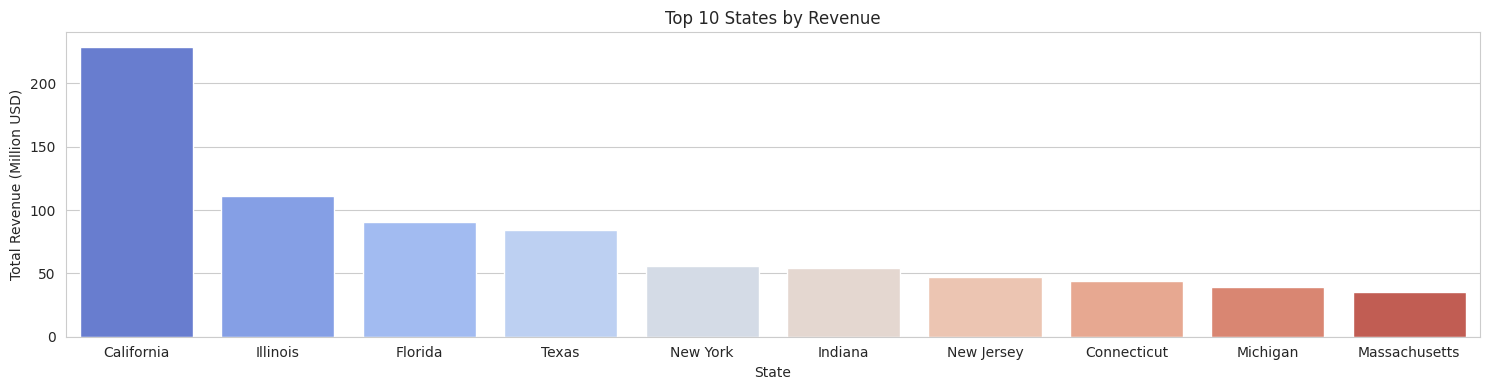

/tmp/ipython-input-136516915.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




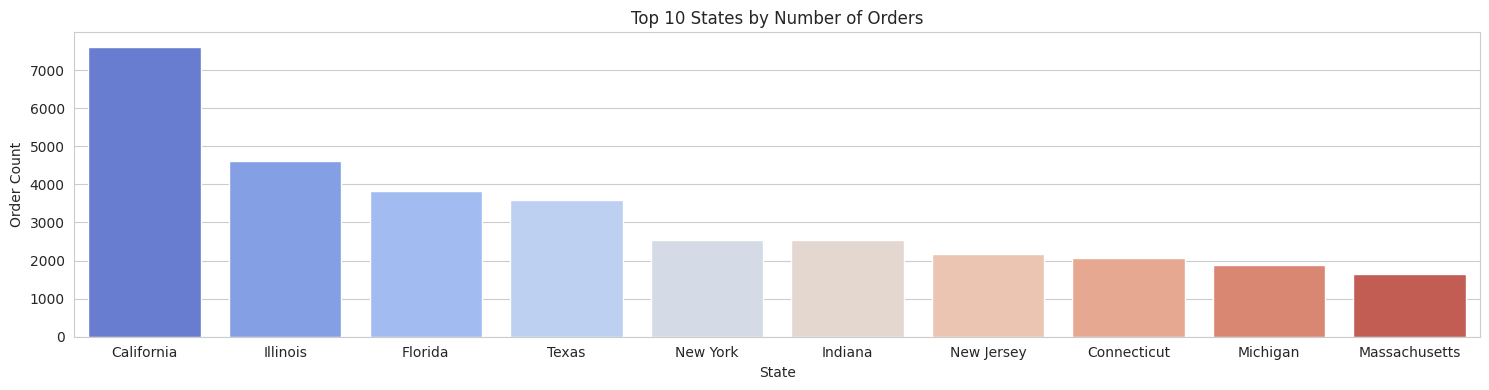

In [64]:
state_rev = df.groupby('state').agg(revenue=('revenue', 'sum'),
    orders=('order_number', 'nunique')).sort_values('revenue', ascending=False).head(10)


plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['revenue'] / 1e6,
    palette='coolwarm'
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (Million USD)')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,
    y=state_rev['orders'],
    palette='coolwarm'
)
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

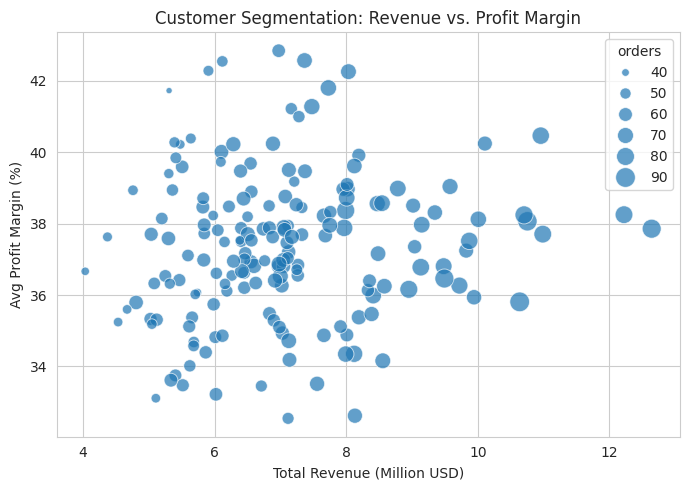

In [65]:
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))


sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

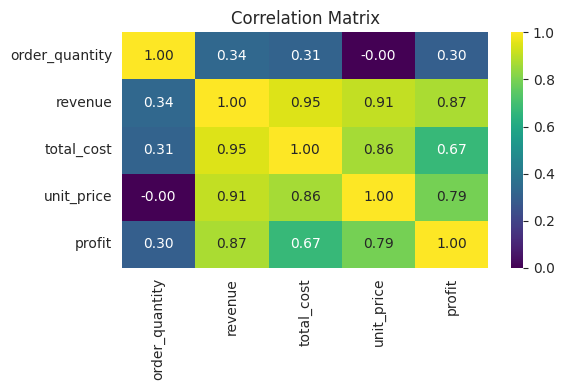

In [68]:
num_cols = ['order_quantity','revenue', 'total_cost', 'unit_price', 'profit']

corr = df[num_cols].corr()

plt.figure(figsize=(6,4))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()